### 第1步：导入必要的库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import plotting
import seaborn as sns

plt.style.use("fivethirtyeight")

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


### 第2步：数据探索分析

In [2]:
# 2.1 读取文件
data = pd.read_csv("Mall_Customers.csv")

In [3]:
# 2.2 可视化前5行
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# 2.3 数据表概况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# 2.4 查看数据表是否有空值
data.isnull().any().any()

False

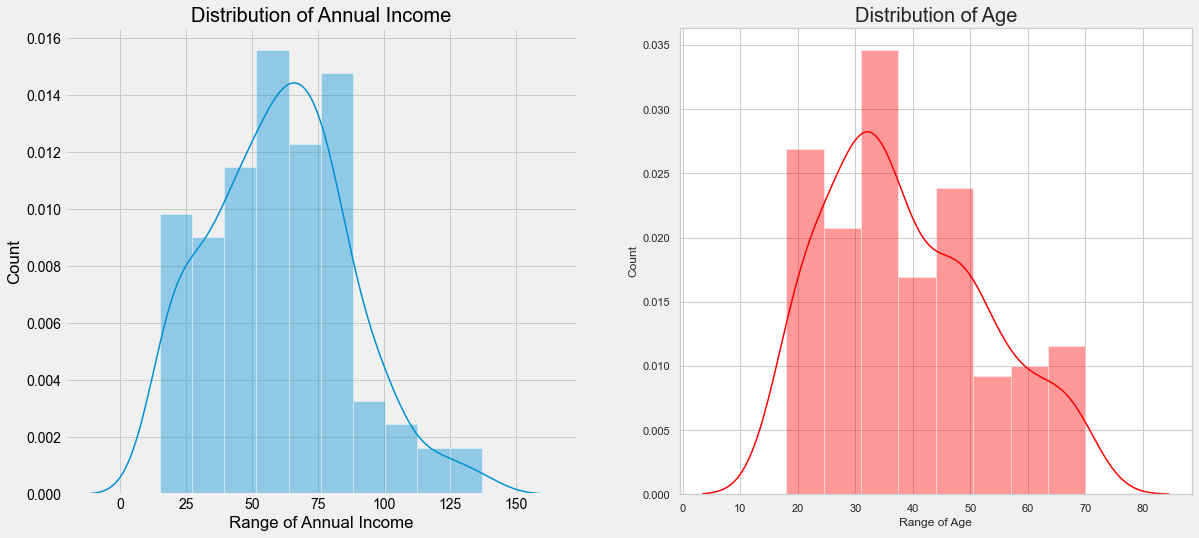

In [6]:
# 2.5 可视化：年收入分布，年龄分布
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8) # 画布大小

# 2.5.1 第一个图表
plt.subplot(1, 2, 1) # 1行2列1号位置
sns.set(style='whitegrid') # 格式设置
sns.distplot(data['Annual Income (k$)']) # 数据展示
plt.title('Distribution of Annual Income', fontsize=20) # 标题设置
plt.xlabel('Range of Annual Income') # 横轴
plt.ylabel('Count') # 纵轴

# 2.5.2 第二个图表
plt.subplot(1, 2, 2) # 1行2列2号位置
sns.set(style='whitegrid') # 格式设置
sns.distplot(data['Age'], color='red') # 数据展示
plt.title('Distribution of Age', fontsize=20) # 标题设置
plt.xlabel('Range of Age') # 横轴
plt.ylabel('Count') # 纵轴
plt.show() # 显示

In [7]:
# 2.6 性别分步
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

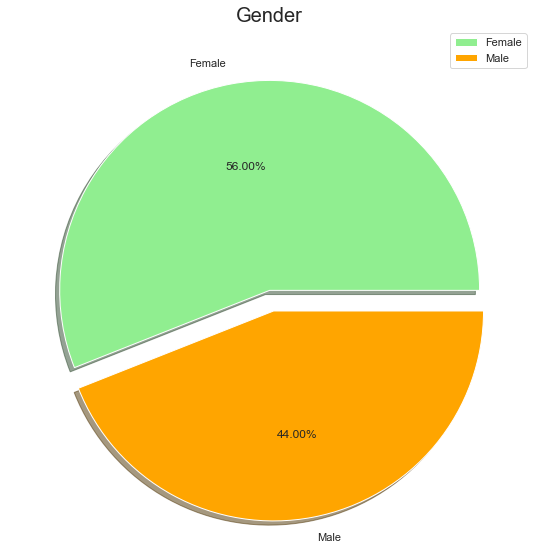

In [8]:
# 2.7 性别分布可视化
labels = ['Female', 'Male'] # 性别标签
size = data['Gender'].value_counts() # 性别统计
colors = ['lightgreen', 'orange'] # 颜色配置
explode = [0, 0.1] # 饼图数据
plt.rcParams['figure.figsize'] = (9, 9) # 画布大小
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%') # 饼图参数设置
plt.title('Gender', fontsize=20) # 标题
plt.axis('off') # 关闭坐标轴
plt.legend() # 显示标签
plt.show() # 显示图

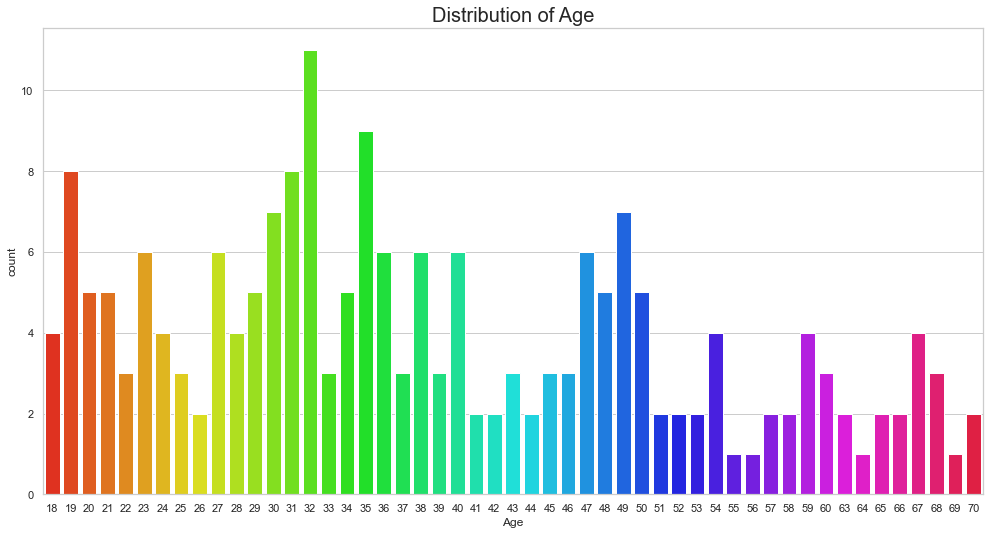

In [9]:
# 2.8 将数据表中的年龄可视化
plt.rcParams['figure.figsize'] = (15, 8) # 画布大小
sns.countplot(data['Age'], palette='hsv') # 以柱状图的形式展示每个类别的数量
plt.title("Distribution of Age", fontsize=20) # 标题
plt.show()

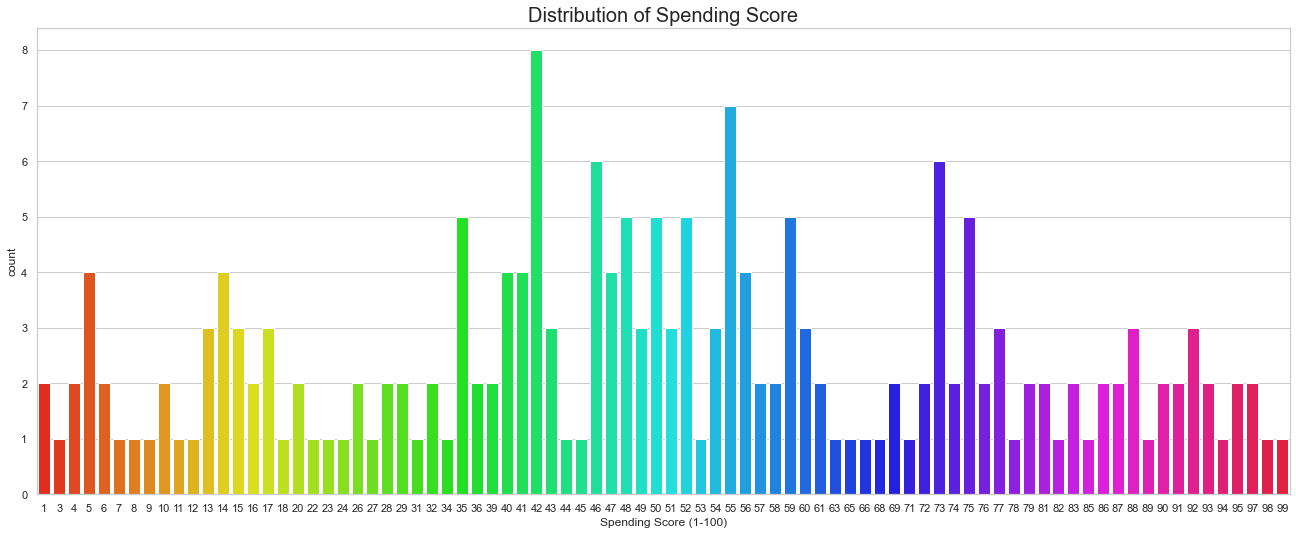

In [10]:
# 2.9 消费得分数据分布
plt.rcParams['figure.figsize'] = (20, 8) # 画布大小
sns.countplot(data['Spending Score (1-100)'], palette='hsv') # 数据展示
plt.title("Distribution of Spending Score", fontsize=20) # 标题
plt.show()

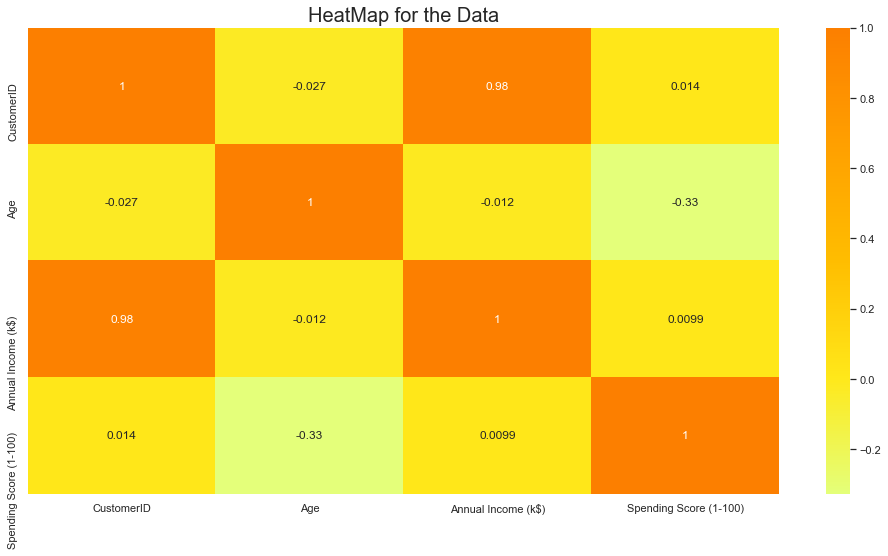

In [11]:
# 2.10 数据之间的相关系数，热图heatMap展示
plt.rcParams['figure.figsize'] = (15, 8) # 画布大小
sns.heatmap(data.corr(), cmap='Wistia', annot=True) # 数据展示
plt.title("HeatMap for the Data", fontsize=20) # 标题
plt.show()

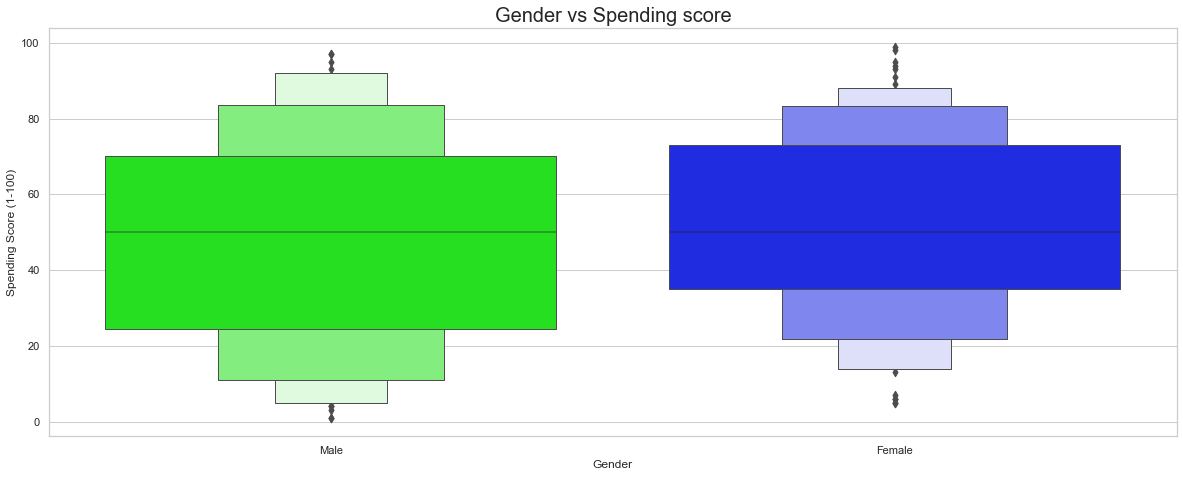

In [12]:
# 2.11 性别 VS 消费得分 之间的数据关联性 展示
plt.rcParams['figure.figsize'] = (18, 7) # 画布大小
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette='hsv') # 数据抽取
plt.title("Gender vs Spending score", fontsize=20) # 标题
plt.show()

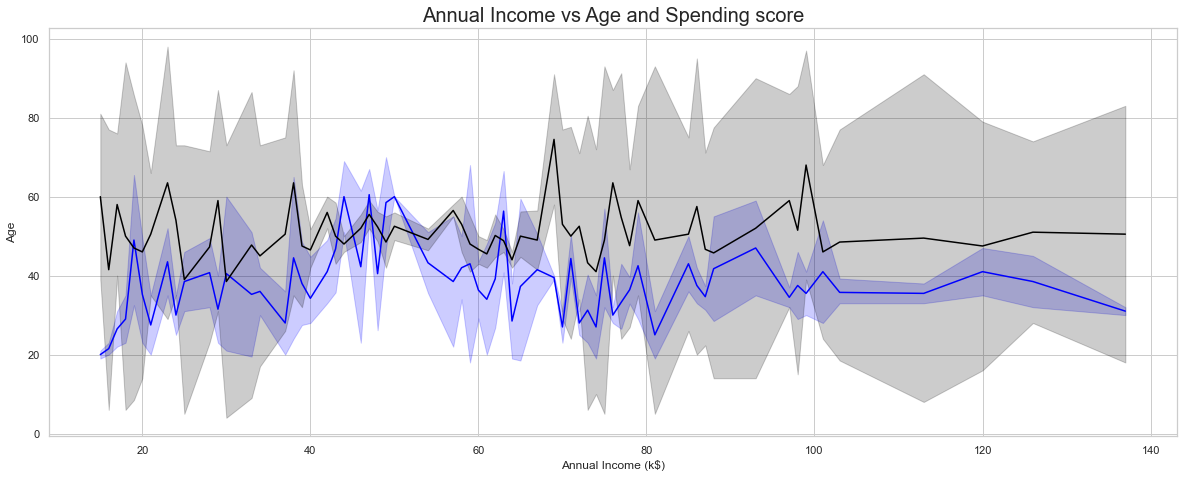

In [13]:
# 2.12 年收入 VS 年龄和消费得分之间的关系
x = data['Annual Income (k$)'] # 年收入
y = data['Age'] # 年龄
z = data['Spending Score (1-100)'] # 消费得分

sns.lineplot(x, y, color='blue') # 年收入 vs 年龄
sns.lineplot(x, z, color='black') # 年收入 vs 消费得分
plt.title("Annual Income vs Age and Spending score", fontsize=20) # 标题
plt.show()

### 第3步：聚类算法：kmeans

In [14]:
# 3.1 获取data的两个特征：Annual Income (k$) 和 Spending Score (1-100)

X = data.iloc[:, [3, 4]].values # 获取第3、4个特征数据

print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(200, 2)


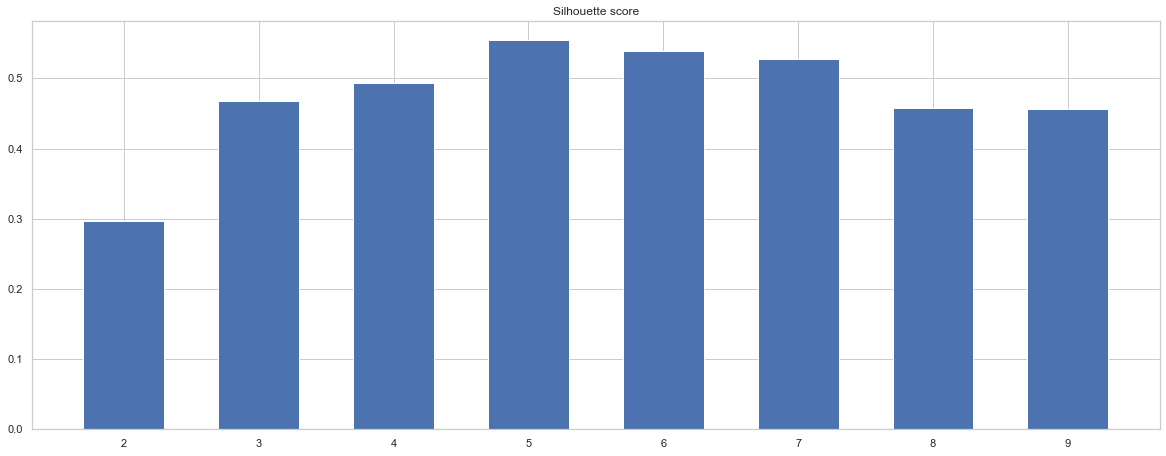

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 3.2 模型创建、训练，选取最优聚类参数k
scores = [] # 得分
range_values = np.arange(2, 10) # 初始聚类个数
for i in range_values:
    # 创建模型对象
    kmeans = KMeans(init='k-means++', n_clusters=i, max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=len(X)) # 计算得分
    scores.append(score)
    
# 3.3 绘制得分结果：柱状图
plt.figure()
plt.bar(range_values, scores, width=0.6, color='b', align='center')
plt.title('Silhouette score')
plt.show()

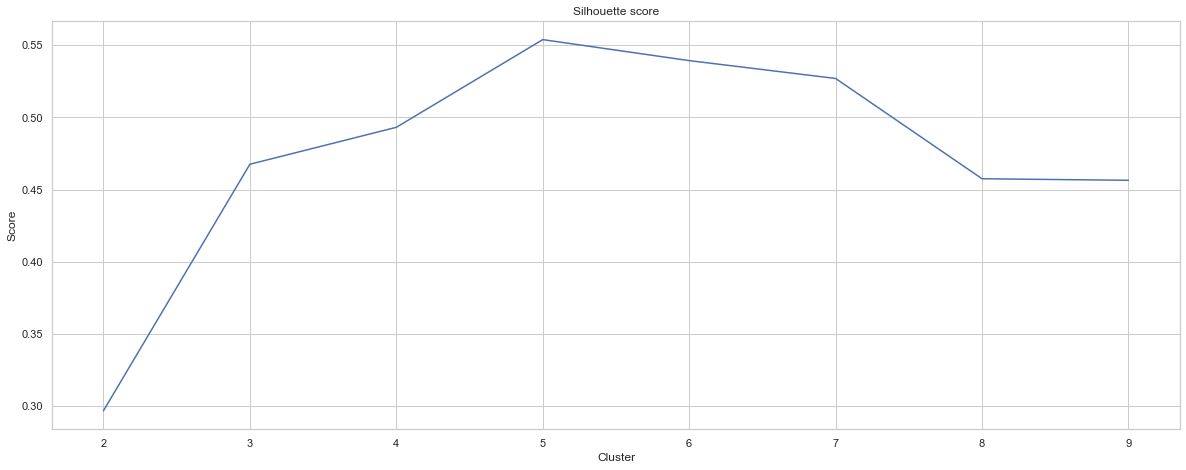

In [16]:
# 3.4 绘制得分结果：折线图
plt.plot(range_values, scores) # 数据
plt.title("Silhouette score") # 标题
plt.xlabel('Cluster') # 横轴
plt.ylabel('Score') # 纵轴
plt.show()

In [17]:
# 3.5 数据聚类，K=5
km = KMeans(init='k-means++', n_clusters=5, max_iter=300, n_init=10, random_state=0, n_jobs=-1) # 聚类对象
y_means = km.fit_predict(X) # 训练

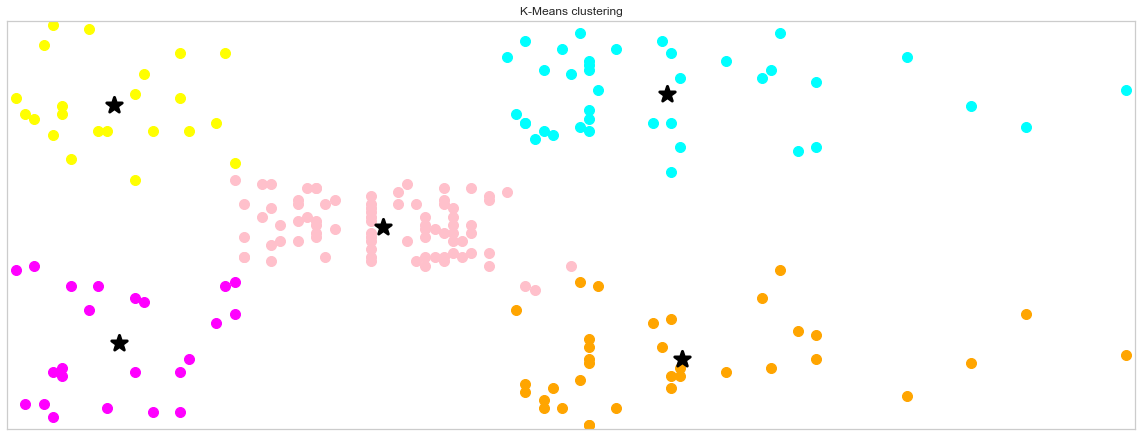

In [18]:
# 3.6 绘制聚类结果
plt.scatter(X[:, 0], X[:, 1], marker='o', facecolors='b', edgecolors='k', s=30) # 绘制特征数据
centroids = km.cluster_centers_ # 质心
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'pink', label = 'miser') # 标签0
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellow', label = 'general') # 标签1
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'cyan', label = 'target') # 标签2
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift') # 标签3
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'orange', label = 'careful') # 标签4
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=260, linewidths=3, color='black', label='centroid') # 质心
x_min, x_max = min(X[:, 0])-1, max(X[:, 0])+1 # 横轴坐标范围
y_min, y_max = min(X[:, 1])-1, max(X[:, 1])+1 # 纵轴坐标范围
plt.title("K-Means clustering") # 标题
plt.xlim(x_min, x_max) # 横轴
plt.ylim(y_min, y_max) # 纵轴
plt.xticks(())
plt.yticks(())
plt.show()

### 第4步：聚类算法：Mean Shift

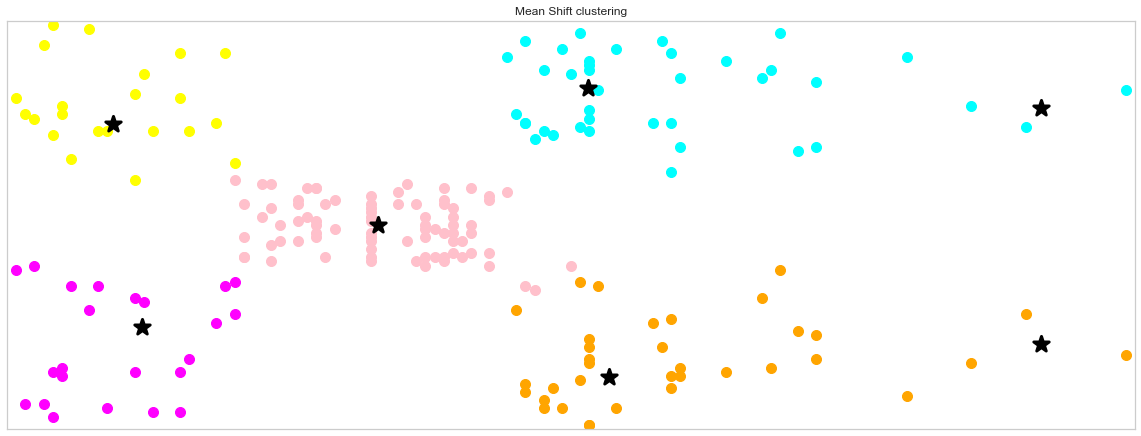

In [19]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# 4.1 聚类算法实现

bandwidth = estimate_bandwidth(X, quantile=0.1) # 带宽（即半径），quantile默认为{0，1}，默认值为0.3
ms = MeanShift(bandwidth=bandwidth).fit(X) # 聚类

# 3.6 绘制聚类结果
plt.scatter(X[:, 0], X[:, 1], marker='o', facecolors='b', edgecolors='k', s=30) # 绘制特征数据
centroids = ms.cluster_centers_ # 质心
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'pink', label = 'miser') # 标签0
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellow', label = 'general') # 标签1
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'cyan', label = 'target') # 标签2
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift') # 标签3
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'orange', label = 'careful') # 标签4
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=260, linewidths=3, color='black', label='centroid') # 质心
x_min, x_max = min(X[:, 0])-1, max(X[:, 0])+1 # 横轴坐标范围
y_min, y_max = min(X[:, 1])-1, max(X[:, 1])+1 # 纵轴坐标范围
plt.title("Mean Shift clustering") # 标题
plt.xlim(x_min, x_max) # 横轴
plt.ylim(y_min, y_max) # 纵轴
plt.xticks(())
plt.yticks(())
plt.show()

### 第6步：选取三个特征：Age，Annual Income，Spending Score

In [20]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values # 选取三个特征的数据

In [21]:
X.shape

(200, 3)

In [22]:
# 6.1 KMeans 算法
km = KMeans(init='k-means++', n_clusters=5, max_iter=300) # 聚类对象
km.fit(X) # 训练

KMeans(n_clusters=5)

In [23]:
# 6.2 获取聚类结果：标签和质心
labels = km.labels_ # 标签

centroids = km.cluster_centers_ # 质心

In [24]:
# 6.3 为原始数据data，增加一列
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
data['labels'] = labels # 增加一列

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2


In [27]:
# 6.4 数据可视化

import plotly.graph_objs as go
import plotly.offline as po

tracel = go.Scatter3d(
    x = data['Age'],
    y = data['Spending Score (1-100)'],
    z = data['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=data['labels'],
        size=10,
        line=dict(
            color=data['labels'],
            width=12
        ),
        opacity=0.8
    )
)

df = [tracel]

layout = go.Layout(
    title = '',
    margin = dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        xaxis = dict(title = 'Age'),
        yaxis = dict(title = 'Spending Score'),
        zaxis = dict(title = 'Annual Income')
    )
)

fig = go.Figure(data = df, layout = layout)
po.iplot(fig)